# Wine Quility Prediction Apk

# step 1. Import the basic library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# step-2. Explore the dataSets

In [2]:
df = pd.read_csv(r"C:\Users\Md Mojammil\OneDrive\Desktop\data\winequality.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# step 3. EDA

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].np.mean())

In [9]:
df.isnull().sum().sum()

0

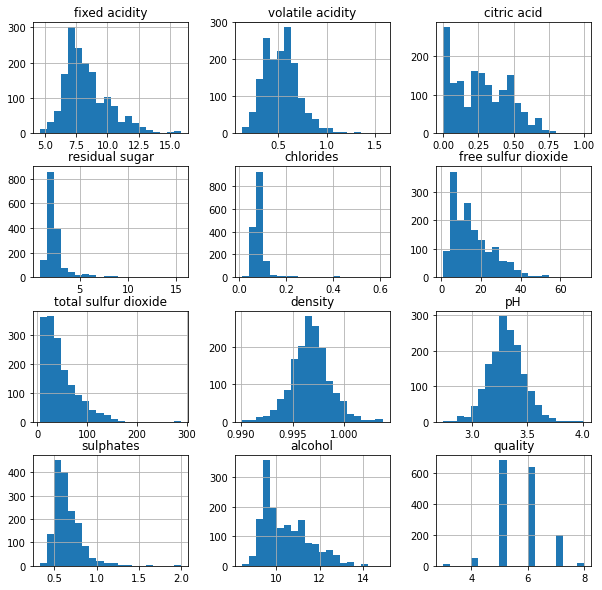

In [10]:
df.hist(bins=20, figsize=(10, 10))
plt.show()


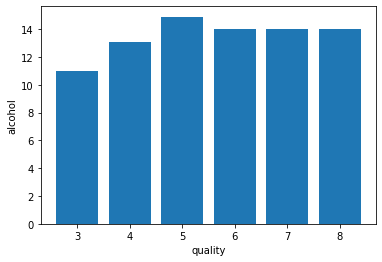

In [11]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

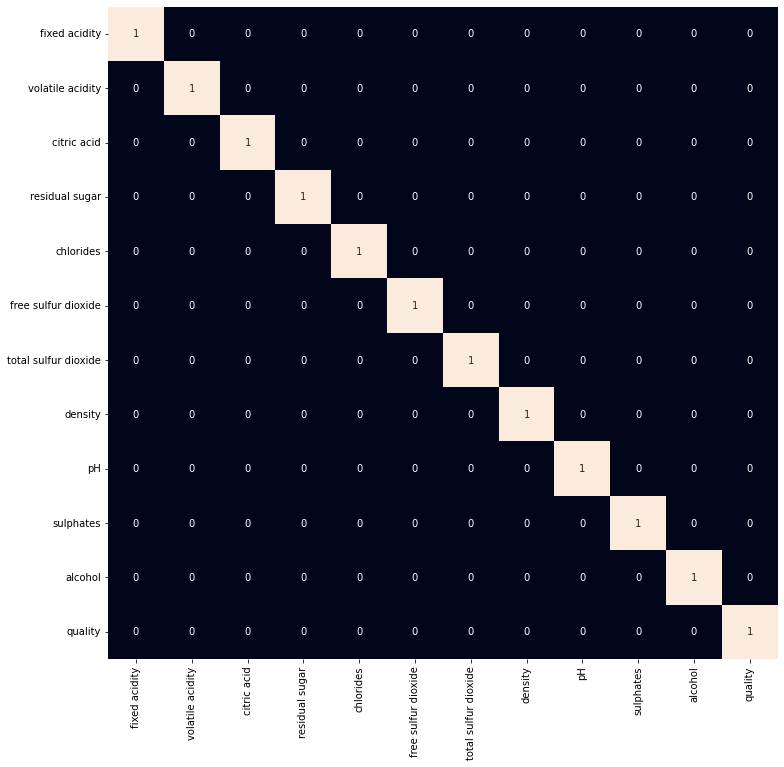

In [12]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

# Model Development

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

### step 1. Split the data sets

In [14]:
df["best quality"] = [1 if x > 5 else 0 for x in df.quality]

In [15]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [16]:
features = df.drop(['quality', 'best quality'], axis=1)

In [17]:
for col in features:
    print(col)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


In [18]:
target = df['best quality']

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)

In [20]:
 xtrain.shape, xtest.shape

((1279, 11), (320, 11))

### step 2. Normalization

In [21]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

### step 3. Model building

In [22]:
from sklearn.metrics import accuracy_score


models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
    model.fit(xtrain, ytrain)
    print(f'Model : {model}')
    print('Training Accuracy : ', accuracy_score(ytrain, model.predict(xtrain)))
    print('Validation Accuracy : ', accuracy_score(ytest, model.predict(xtest)))
    print()

Model : LogisticRegression()
Training Accuracy :  0.7380766223612197
Validation Accuracy :  0.775

Model : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Training Accuracy :  1.0
Validation Accuracy :  0.85

Model : SVC()
Training Accuracy :  0.7756059421422987
Validation Accuracy :  0.77

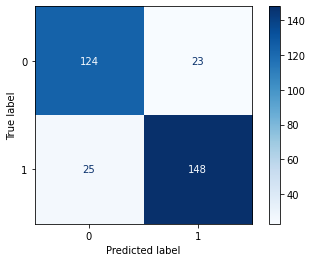

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming models is a list of classifiers and xtest, ytest are your test data
cm = confusion_matrix(ytest, models[1].predict(xtest))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[1].classes_)
disp.plot(cmap='Blues')
plt.show()


In [24]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [25]:
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


# Create the XGBoost model
xgb_model = XGBClassifier()

# Train the XGBoost model
xgb_model.fit(xtrain, ytrain)

# Function to predict quality and display the result
def predict_quality():
    # Get user input from the entry widgets
    values = [float(entry.get()) for entry in entry_widgets]
    
    # Make a prediction using the XGBoost model
    prediction = xgb_model.predict([values])[0]
    
    # Display the result
    result_label.config(text=f"Predicted Quality: {prediction}")

# Create the main window
root = tk.Tk()
root.title("Wine Quality Predictor")

# Load the background image
background_image = Image.open(r"C:\Users\Md Mojammil\OneDrive\Desktop\data\photo\winefig.jpg")
background_photo = ImageTk.PhotoImage(background_image)

# Set the window size to match the background image size
root.geometry(f"{background_image.width}x{background_image.height}")

# Create a label for the background image
background_label = tk.Label(root, image=background_photo)
background_label.place(relwidth=1, relheight=1)

# Create entry widgets for user input
entry_widgets = [ttk.Entry(root) for _ in features]

# Create labels for entry widgets
for i, feature in enumerate(features):
    ttk.Label(root, text=feature).grid(row=i, column=0, padx=10, pady=5, sticky='e')
    entry_widgets[i].grid(row=i, column=1, padx=10, pady=5)

# Create a button to make predictions
predict_button = ttk.Button(root, text="Predict Quality", command=predict_quality)
predict_button.grid(row=len(features) + 1, column=0, columnspan=2, pady=10)

# Label to display the prediction result
result_label = ttk.Label(root, text="")
result_label.grid(row=len(features) + 2, column=0, columnspan=2, pady=10)

# Start the GUI event loop
root.mainloop()
